In [91]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import itertools
import collections

In [92]:
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

In [93]:
import warnings 
warnings.filterwarnings("ignore")

In [94]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [95]:
consumer_key= 'kddJehcB90Dnv3ML3YppZLYQG'
consumer_secret= 'ATd9nUPEkkrBh8SkqoJDuyPK4UHguH4UF2hK3ySwgsRG2WGmO0'
access_token= '1332867937926074368-dhmkVzBqgbtjE6ZB62plVGYr5hyYl9'
access_token_secret= 'SDAcXr4sszG6AVLfHjlSecf4zmtuHdWpimtX8EoLdTGhp'

In [96]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [97]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

search_term = "#cocacola -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-11-22').items(1000)

In [98]:
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]
sentiment_objects[0].polarity, sentiment_objects[0]
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_values[0]
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df.head()

polarity                                              tweet
0       0.0  Only southerners know whats up here SouthernCh...
1       0.0  M2 Machines 1970 Ford C950 1966 Ford Mustang G...
2       0.0  Yall You telling me even descendants of ppl wh...
3       0.0  Transforming African economies to sustainable ...
4       0.0  Its OFFICIAL Christmas has arrived I can now t...

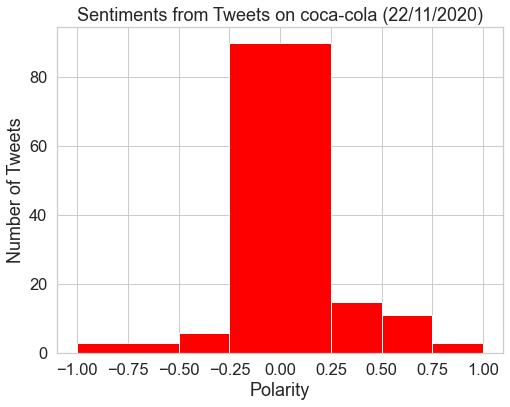

In [100]:
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1,-0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="Red")

plt.title("Sentiments from Tweets on coca-cola (22/11/2020)")
plt.xlabel("Polarity")
plt.ylabel("Number of Tweets")
plt.show()